# Data Mining  Project
#### Amir Ilan 322868662, Noam Diamant 208520262

Import libraries and load the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# for inline plots in jupyter
%matplotlib inline 
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

df = pd.read_csv("./hotels_train.csv") # load the data from the CSV file

### 1. Show the data information, e.g., types of attributes, the attributes values etc.

First, we will examine the data to determine the data type of each column and the overall shape of the dataset.

In [3]:
print("The shape of the data is: ", df.shape)
print("The number of hotel reservations are: ", df.shape[0])
print("The number of hotel attributes are: ", df.shape[1])

The shape of the data is:  (27213, 18)
The number of hotel reservations are:  27213
The number of hotel attributes are:  18


1.1 Types of the attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

1.2 Attributes values

In [5]:
df.head(10)

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.40,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.30,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.00,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.00,10/19/2017,0
5,INN19311,0,2,Room_Type 1,half board,2,0,0,0,2,414.0,Online,0,0,0,98.30,12/20/2018,1
6,INN13835,2,4,Room_Type 4,half board,3,0,0,0,2,168.0,Online,0,0,0,123.42,5/28/2018,0
7,INN15297,2,3,Room_Type 1,NaN,2,0,0,0,1,92.0,NaN,0,0,0,78.90,3/27/2018,0
8,INN17084,0,2,Room_Type 1,full board,2,0,0,0,1,9.0,Online,0,0,0,136.80,10/21/2018,0
9,INN11644,0,3,Room_Type 1,breakfast,2,0,0,0,1,180.0,Offline,0,0,0,110.00,6/16/2018,0


From the information above, we can identify missing values, attribute data types, and any mismatched data types.

Missing values: Present in the attributes 'board_type', 'lead_time', 'purchase_type', 'price'.
Unmatched data type: The 'room_type' attribute has an object data type, but we will remove the 'Room_type' string for convenience.    

Generates summary statistics for all columns in a the dataFrame, including both numerical and categorical data.

In [6]:
df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


remove the 'room_type' string from 'room_type' colmun for convenience:

In [7]:
# Use str.extract() to extract numeric values
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)

# Verify the data type after conversion
df["room_type"].dtype

dtype('int32')

view the change

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  int32  
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

#### During the data analysis we noticed that in 27 places in the data there is an illogical date. We changed the nonsensical date everywhere it appeared to the date closest to it. and that how we handled the inconsitences
Split 'date' column to day, month, year:

In [9]:
df.loc[df['date'] == '2018-2-29', 'date'] = '03/01/2018'
# Split the "date" column into separate columns
df[["month", "day", "year"]] = df["date"].str.split("/", expand=True)
df["month"] = df["month"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
df["day"] = df["day"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
df["year"] = df["year"].str.extract('(\d+\.?\d*)', expand = True).astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  int32  
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

### Split to attributes and target

In [11]:
target =pd.DataFrame(df['is_canceled']) 
#df = df.drop(['is_canceled'], axis=1) #to add date?
df

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,day,year
0,INN09588,1,5,1,half board,2,0,0,0,2,...,Online,0,0,0,108.4,11/28/2018,0,11,28,2018
1,INN07691,0,3,1,NaN,2,0,0,0,0,...,NaN,0,0,0,NaN,11/03/2018,1,11,3,2018
2,INN32192,0,2,4,half board,1,0,0,0,1,...,Online,0,0,0,137.3,05/06/2018,0,5,6,2018
3,INN32218,1,2,1,NaN,2,0,0,0,0,...,Offline,0,0,0,127.0,9/26/2018,1,9,26,2018
4,INN02994,1,3,4,half board,2,0,1,0,2,...,Offline,0,0,0,110.0,10/19/2017,0,10,19,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,INN09056,1,2,1,NaN,3,0,0,0,1,...,NaN,0,0,0,NaN,7/18/2018,0,7,18,2018
27209,INN24796,0,4,1,half board,2,0,0,0,1,...,Online,0,0,0,113.0,2/24/2018,0,2,24,2018
27210,INN22554,0,2,1,NaN,2,0,0,0,0,...,Offline,0,0,0,105.0,4/15/2018,1,4,15,2018
27211,INN33957,1,0,4,half board,1,0,0,0,0,...,Aviation,0,0,0,130.0,5/22/2018,1,5,22,2018


In [12]:
df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,day,year
count,27213,27213.000000,27213.000000,27213.000000,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,...,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000,27213.000000,27213.000000,27213.000000
unique,27213,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,5,NaN,NaN,NaN,NaN,552,NaN,NaN,NaN,NaN
top,INN09588,NaN,NaN,NaN,half board,NaN,NaN,NaN,NaN,NaN,...,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,14591,NaN,NaN,NaN,NaN,NaN,...,14306,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN
mean,NaN,0.812810,2.197332,1.712637,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,...,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674,7.430456,15.576930,2017.821703
std,NaN,0.869317,1.403576,1.404446,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,...,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374,3.061317,8.749339,0.383154
min,NaN,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000,1.000000,1.000000,2015.000000
25%,NaN,0.000000,1.000000,1.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000,5.000000,8.000000,2018.000000
50%,NaN,1.000000,2.000000,1.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000,8.000000,16.000000,2018.000000
75%,NaN,2.000000,3.000000,1.000000,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,...,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000,10.000000,23.000000,2018.000000


### 2. Show the data statistics, e.g., distribution, skewness, median and more.
#### Split to nominal (string) and numerical (int) attributes

In [13]:
numeric_col = df.describe().columns # to get the numeric column
numeric_col

Index(['weekend_nights', 'week_nights', 'room_type', 'n_adults', 'n_less_12',
       'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
       'n_p_cacellation', 'n_p_not_cacellation', 'repeated', 'price',
       'is_canceled', 'month', 'day', 'year'],
      dtype='object')

In [14]:
numeric_data = df[numeric_col]
nominal_data = df.drop(numeric_col, axis=1)

### Numerical data
For numerical data we would like to know the range of values, whether there are outliers, the distribution and other statistics, so first we will draw the histograms.

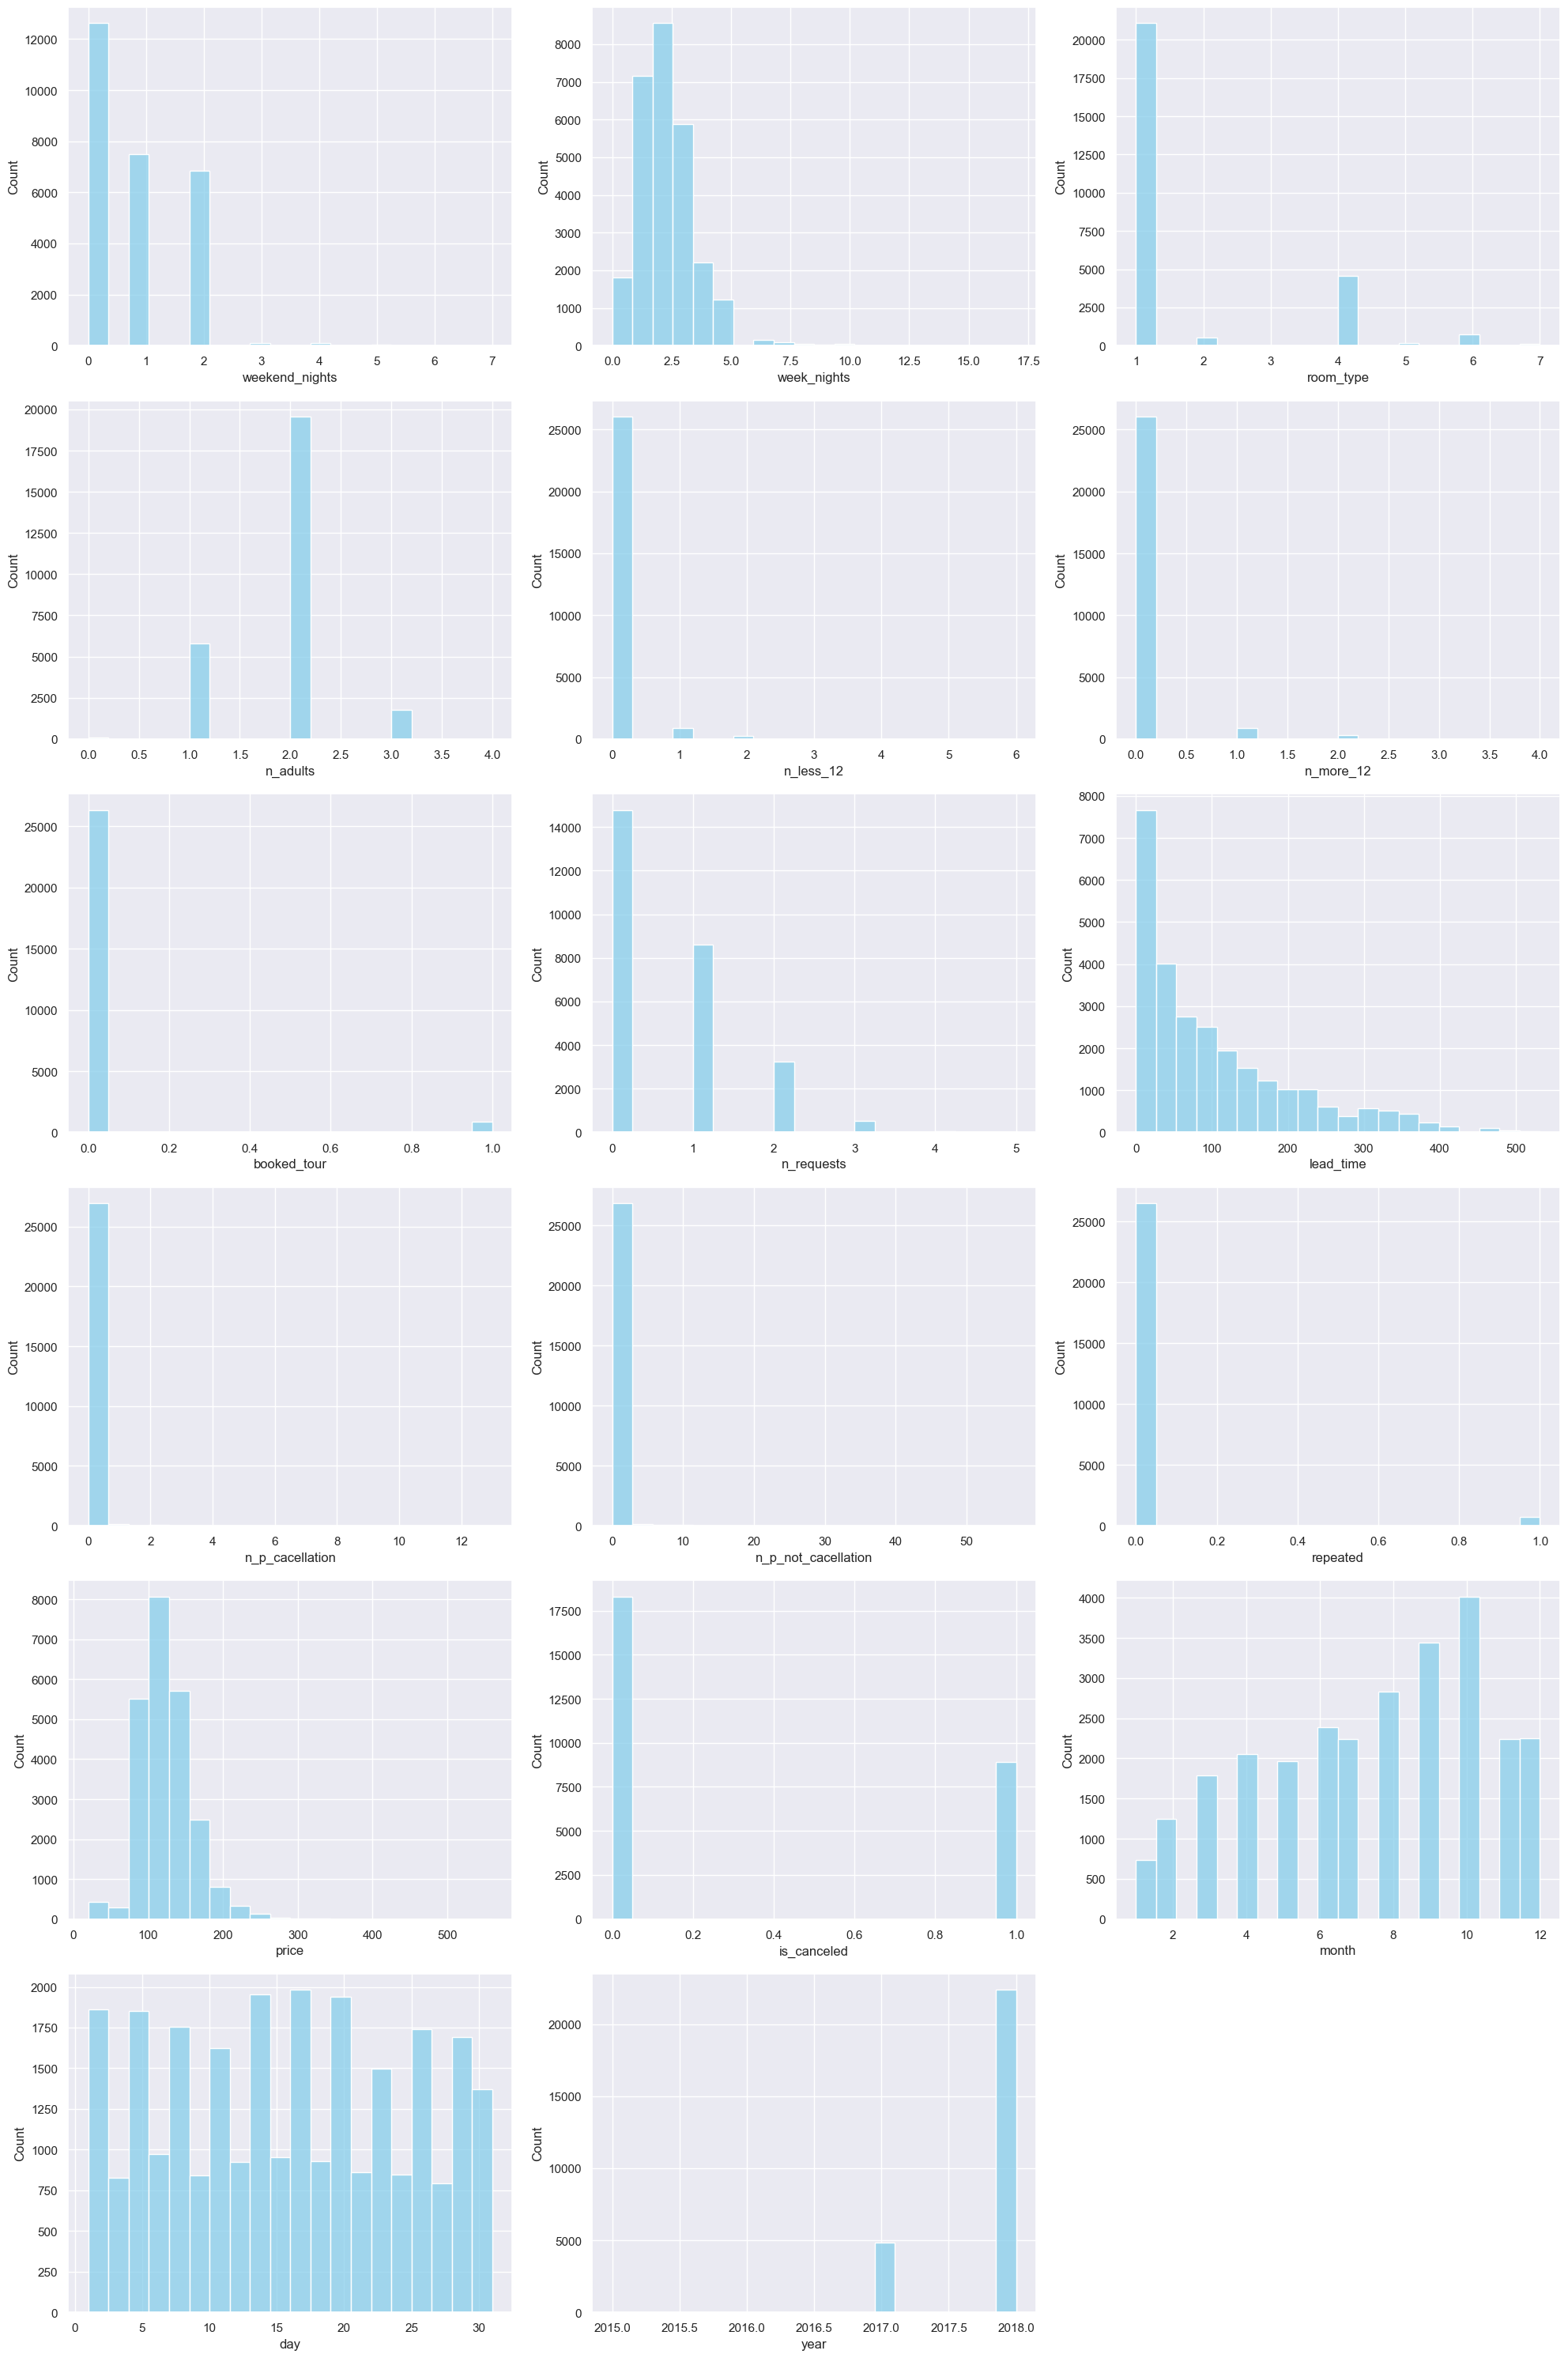

In [16]:
# Assuming numeric_col is a list of column names and numeric_data is your DataFrame

# Number of plots
num_plots = len(numeric_col)

# Calculate number of rows needed (ceil division)
num_rows = (num_plots + 2) // 3  # +2 to account for the final row with less than 3 plots

# Create a large figure
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.histplot(numeric_data[col], bins=20, color='skyblue', ax=axes[i])

# Remove any unused subplots in the last row
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


From the histograms above it looks like 'price', 'lead_time' and 'week_nights' is normal distributed whereas the other attributes are not. Moreover, we can see that 'weekend_nights', 'n_adults', 'n_more_12', 'n_requests', 'room_type', 'booked_tour', 'n_p_cancellation', 'n_p_not_cancellation', 'repeated', 'month', 'day', 'year' and 'n_less_12' has only few values with importance to the order i.e. it's a categorical ordinal attribute.

#### Statistic information:
Describe function show statistic information for numerical data.

In [17]:
numeric_data.describe()

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled,month,day,year
count,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,27213.000000,27213.000000,27213.000000,23808.000000,27213.000000,27213.000000,27213.000000,27213.000000
mean,0.812810,2.197332,1.712637,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,0.021975,0.155404,0.026421,123.455494,0.327674,7.430456,15.576930,2017.821703
std,0.869317,1.403576,1.404446,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,0.346697,1.728693,0.160387,35.136566,0.469374,3.061317,8.749339,0.383154
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,2015.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,100.300000,0.000000,5.000000,8.000000,2018.000000
50%,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,119.450000,0.000000,8.000000,16.000000,2018.000000
75%,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,0.000000,0.000000,0.000000,140.000000,1.000000,10.000000,23.000000,2018.000000
max,7.000000,17.000000,7.000000,4.000000,6.000000,4.000000,1.000000,5.000000,532.000000,13.000000,57.000000,1.000000,560.000000,1.000000,12.000000,31.000000,2018.000000


#### Skewness
for the real numeric attributes

In [18]:
for col in ['price', 'week_nights', 'lead_time']:
    print(col+':')
    print('\tskewness:', numeric_data[col].skew(axis = 0, skipna = True))
    print('\tmedian:', numeric_data[col].median(axis = 0, skipna = True))
    

price:
	skewness: 0.682392611272259
	median: 119.45
week_nights:
	skewness: 1.5422954469230514
	median: 2.0
lead_time:
	skewness: 1.291447308852505
	median: 69.0


We can also look at the probability

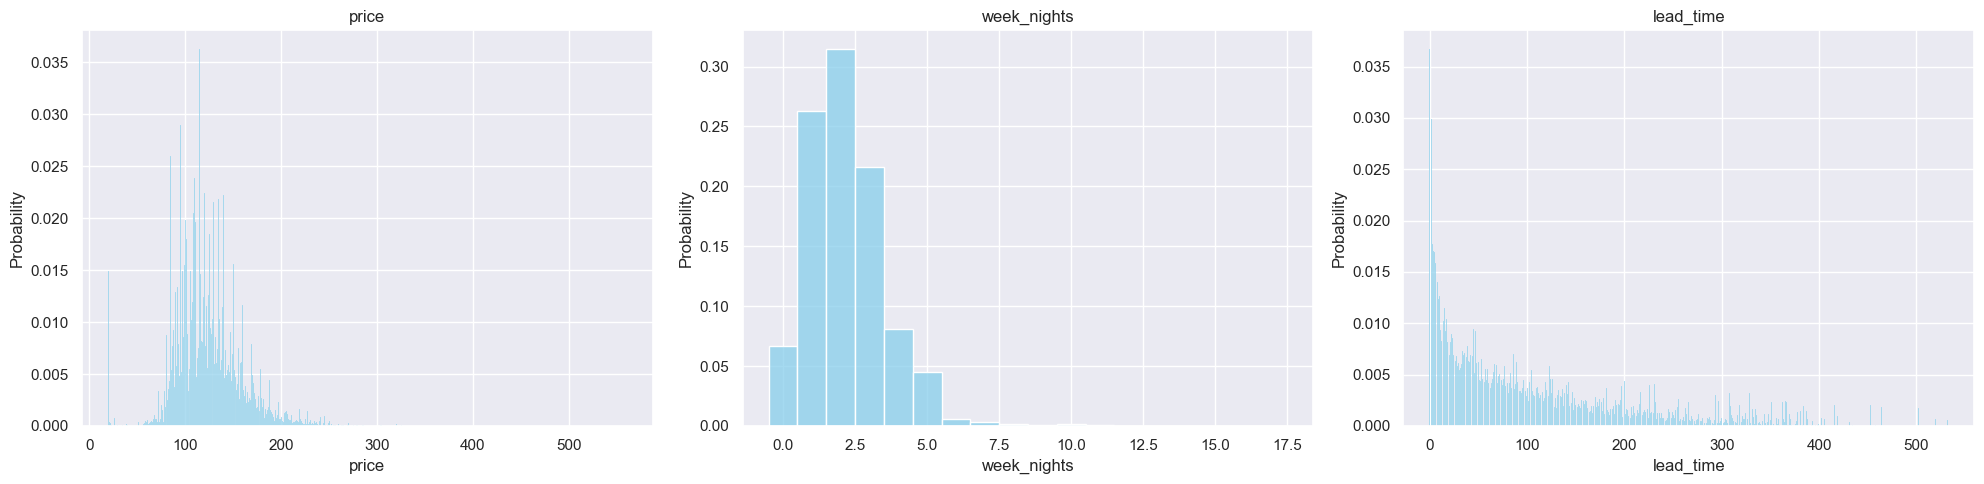

In [73]:
# Create a figure with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# List of columns to plot
columns = ['price', 'week_nights', 'lead_time']

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(columns):
    sns.histplot(numeric_data[col], color='skyblue', stat="probability", discrete=True, ax=axes[i])
    axes[i].set_title(col)  # Optional: add title for each subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Check the values in 'price'

In [20]:
print('min:', numeric_data['price'].min())
print('max:', numeric_data['price'].max())
print('values over 350:', numeric_data[numeric_data['price']>350].shape[0])
print('values under 10:', numeric_data[numeric_data['price']<30].shape[0])

min: 20.0
max: 560.0
values over 350: 2
values under 10: 395


Maybe there are outliers?

In [21]:
df[df['price']>350]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,day,year
4092,INN34307,0,3,6,breakfast,2,0,2,0,1,...,Online,0,0,0,369.63,12/29/2018,0,12,29,2018
9412,INN33115,0,1,1,half board,2,0,0,0,0,...,Offline,0,0,0,560.00,3/25/2018,1,3,25,2018


# Box plot

c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


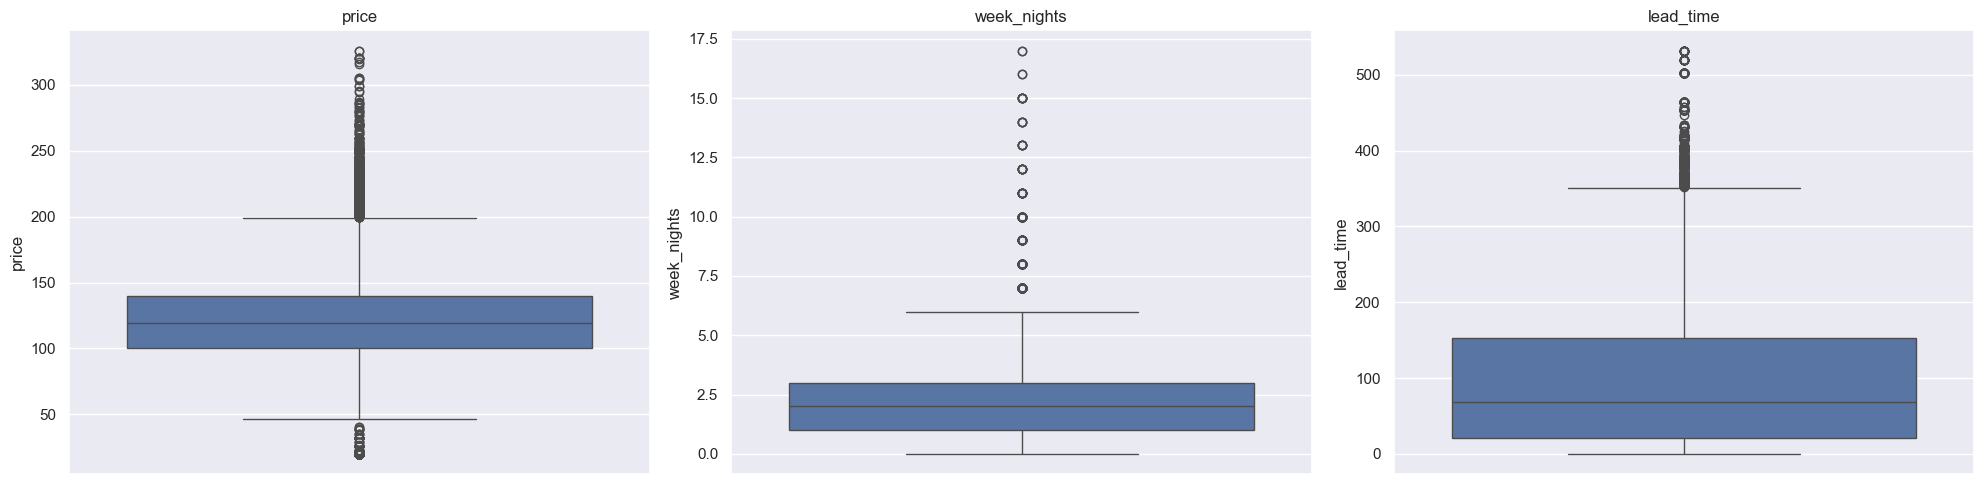

In [76]:
columns = ['price', 'week_nights', 'lead_time']

# Create a figure with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(col)  # Optional: add title for each subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Categorial attributes

In [25]:
cat_col = ['weekend_nights', 'n_adults', 'n_more_12','n_less_12', 'n_requests', 'room_type', 'booked_tour', 'n_p_cacellation', 'n_p_not_cacellation', 'repeated', 'month', 'day', 'year']
for col in cat_col:
    print(numeric_data[col].value_counts().sort_index())
    print('-----------------------------')

weekend_nights
0    12621
1     7492
2     6857
3      115
4       89
5       23
6       15
7        1
Name: count, dtype: int64
-----------------------------
n_adults
0      104
1     5781
2    19565
3     1749
4       14
Name: count, dtype: int64
-----------------------------
n_more_12
0    26051
1      876
2      283
3        2
4        1
Name: count, dtype: int64
-----------------------------
n_less_12
0    26040
1      910
2      260
3        2
6        1
Name: count, dtype: int64
-----------------------------
n_requests
0    14786
1     8596
2     3257
3      511
4       56
5        7
Name: count, dtype: int64
-----------------------------
room_type
1    21084
2      511
3        3
4     4571
5      180
6      741
7      123
Name: count, dtype: int64
-----------------------------
booked_tour
0    26349
1      864
Name: count, dtype: int64
-----------------------------
n_p_cacellation
0     26959
1       154
2        37
3        27
4         9
5         8
11       17
13        2
N

## Nominal data
For nominal data we would like to know how many unique values there are and the distribution.

In [26]:
nominal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             27213 non-null  object
 1   board_type     19045 non-null  object
 2   purchase_type  22366 non-null  object
 3   date           27213 non-null  object
dtypes: object(4)
memory usage: 850.5+ KB


Describe function for nominal data show information about unique value, top value and the top value frequency.

In [27]:
describe_df = nominal_data.describe()
describe_df

,ID,board_type,purchase_type,date
count,27213,19045,22366,27213
unique,27213,4,5,552
top,INN09588,half board,Online,10/13/2018
freq,1,14591,14306,188


Adding the top value frequency in percent.

In [28]:
describe_df.loc['%freq'] = describe_df.apply(lambda x: np.round(x.loc['freq']/891, decimals=3))
describe_df

,ID,board_type,purchase_type,date
count,27213,19045,22366,27213
unique,27213,4,5,552
top,INN09588,half board,Online,10/13/2018
freq,1,14591,14306,188
%freq,0.001,16.376,16.056,0.211


#### Histograms
Handale missing values - fill in just to be able to see the histograms.

In [29]:
nominal_data = nominal_data.fillna('Missing')

In [30]:
nominal_data['board_type'].value_counts()

board_type
half board      14591
Missing          8168
full board       2697
breakfast        1753
not selected        4
Name: count, dtype: int64

##### Insert the nominal missing values to the datadrame

In [31]:
df['board_type'] = nominal_data['board_type']
df['purchase_type'] = nominal_data['purchase_type']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  int32  
 4   board_type           27213 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        27213 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [32]:
nominal_data['purchase_type'].value_counts()

purchase_type
Online           14306
Offline           6501
Missing           4847
Corporate         1238
Complementary      244
Aviation            77
Name: count, dtype: int64

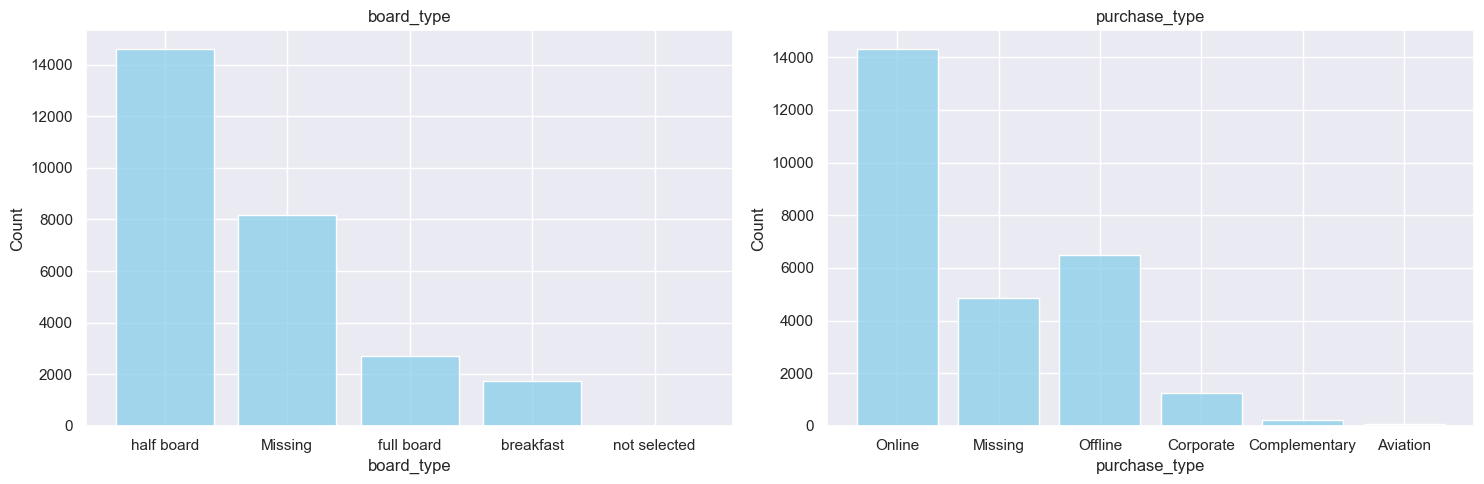

In [81]:
dist_col = ['board_type', 'purchase_type']

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(dist_col):
    sns.histplot(nominal_data[col], shrink=0.8, color='skyblue', ax=axes[i])
    axes[i].set_title(col)  # Optional: add title for each subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Target

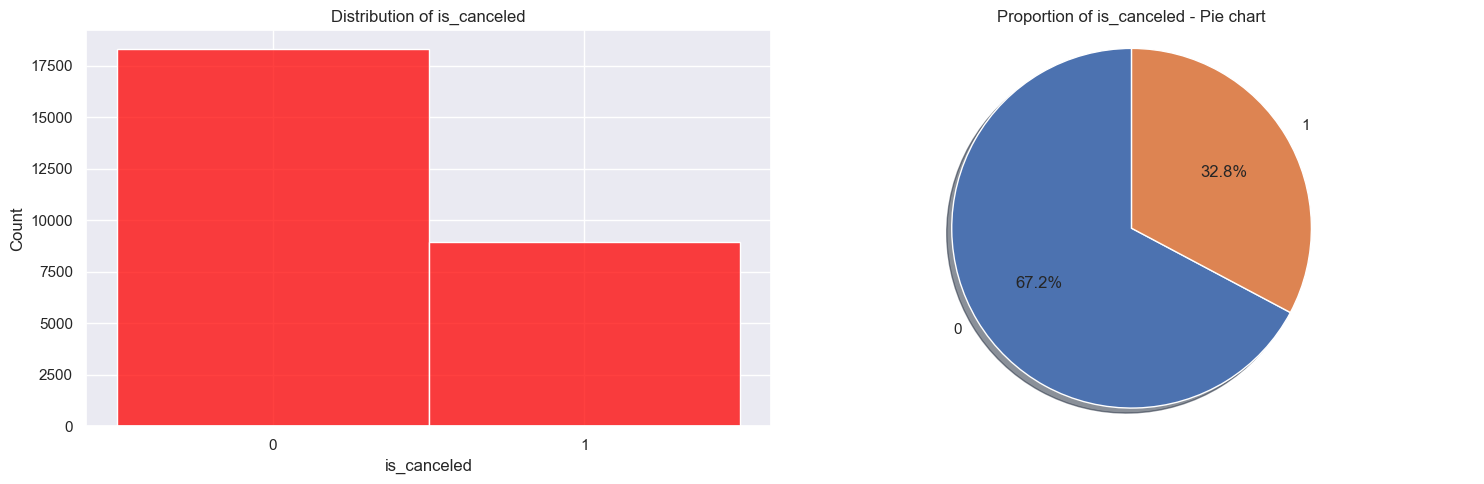

In [87]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the displot on the first subplot
sns.histplot(target, x='is_canceled', color='red', discrete=True, ax=axes[0])
axes[0].set_title('Distribution of is_canceled')  # Optional: add title for the first subplot
axes[0].set_xticks([0, 1])  # Set x-ticks to show only 0 and 1

# Plot the pie chart on the second subplot
axes[1].pie(target['is_canceled'].value_counts(), labels=target['is_canceled'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Proportion of is_canceled - Pie chart')  # Optional: add title for the second subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Exploring the behavior of the attributes according to the target values

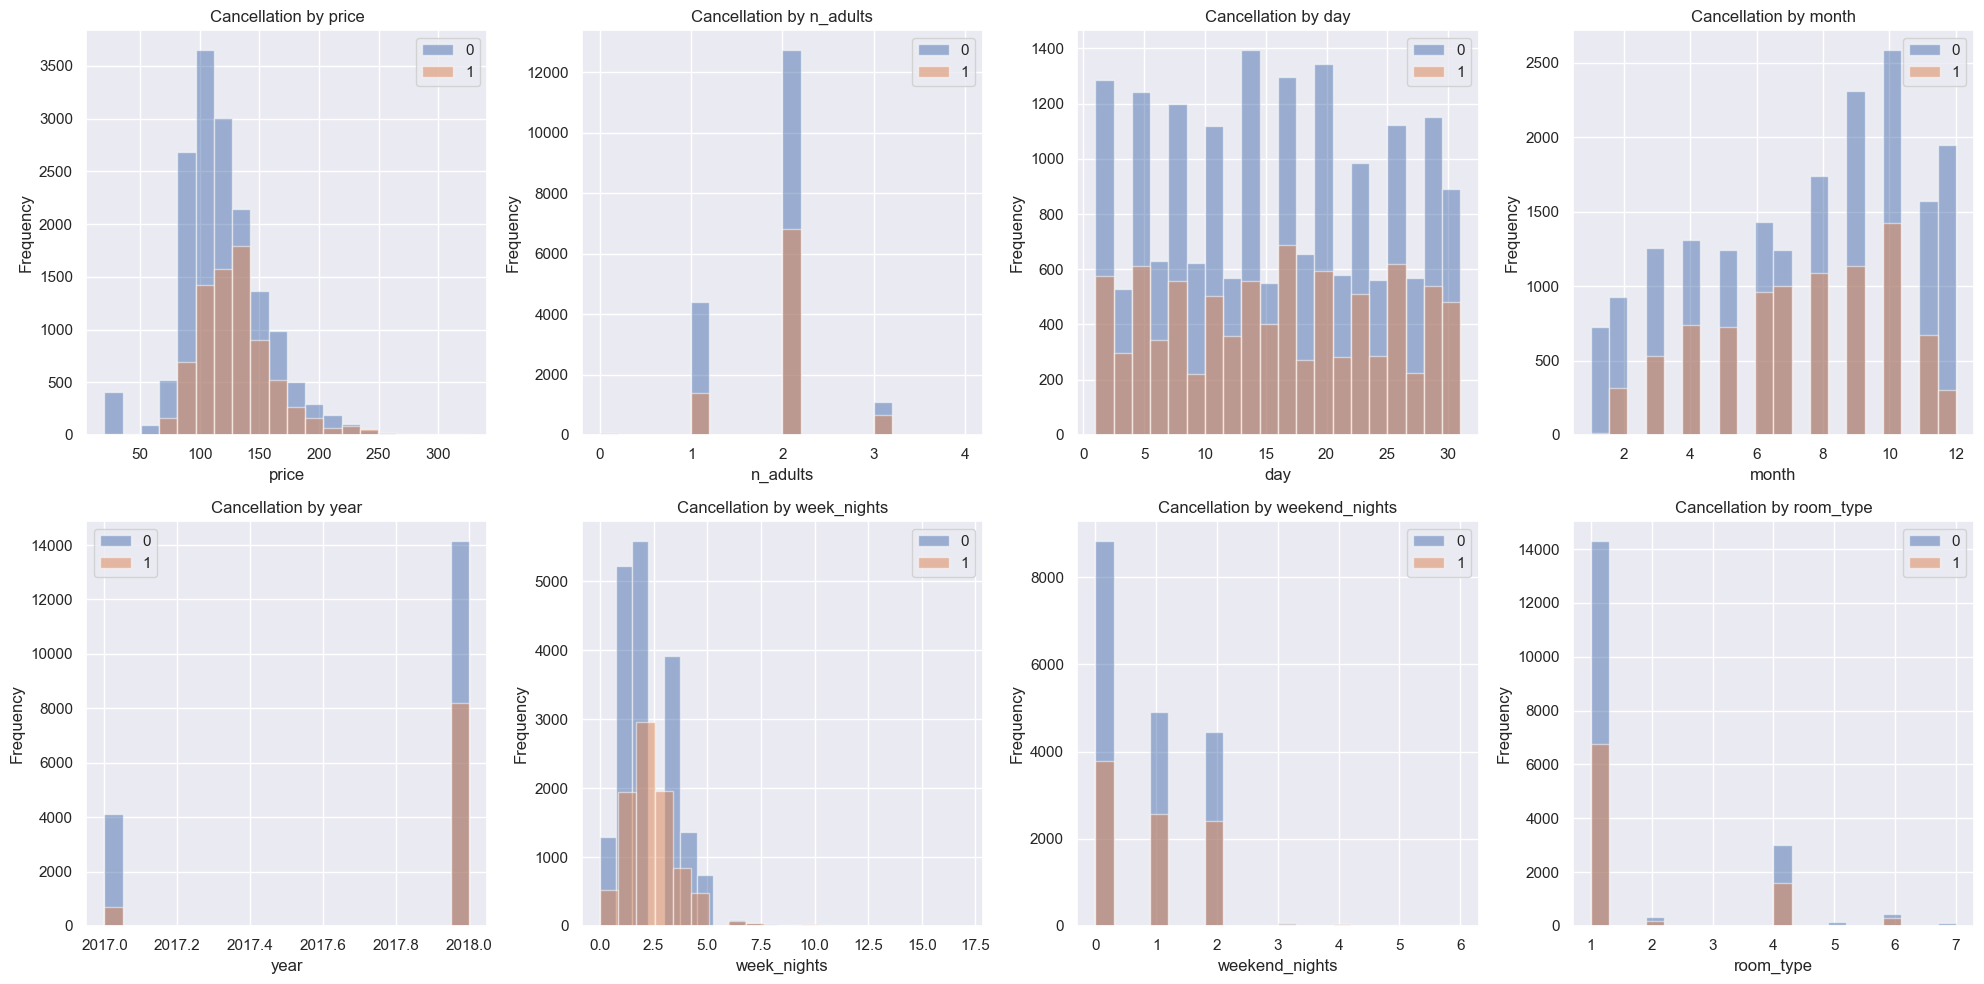

In [92]:
columns = ['price', 'n_adults', 'day', 'month', 'year', 'week_nights', 'weekend_nights', 'room_type']


# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot each one in its corresponding subplot
for i, col in enumerate(columns):
    df.groupby('is_canceled')[col].plot(kind='hist', bins=20, alpha=0.5, legend=True, ax=axes[i])
    axes[i].set_title(f'Cancellation by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Scatter plot

Text(0, 0.5, 'price')

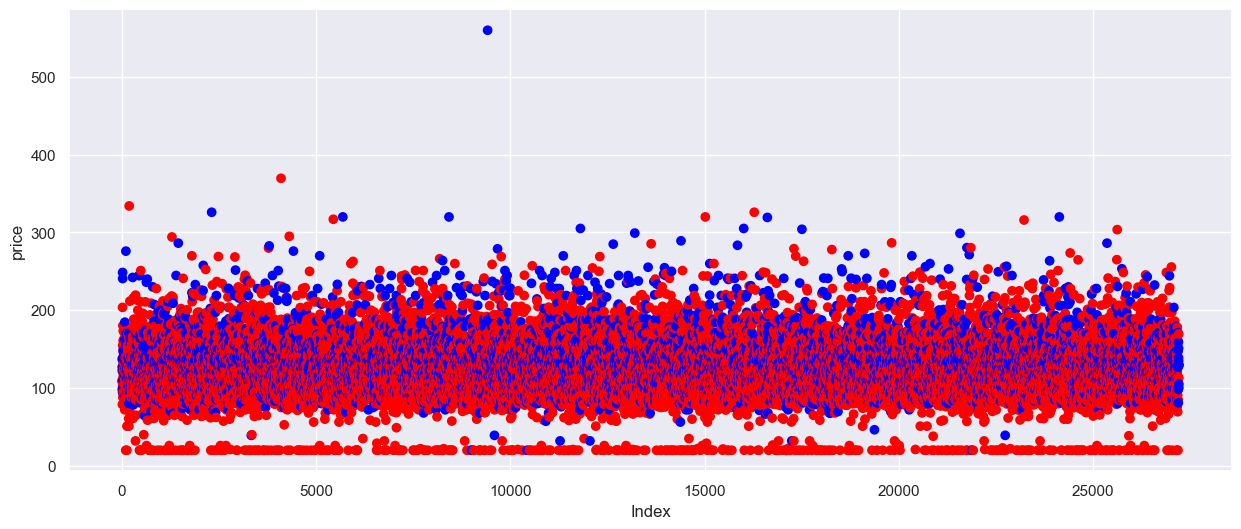

In [44]:
colordict = {0: 'red', 1: 'blue'}

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['price'], c = df['is_canceled'].map(colordict))
plt.xlabel("Index")
plt.ylabel('price')

Text(0, 0.5, 'week nights')

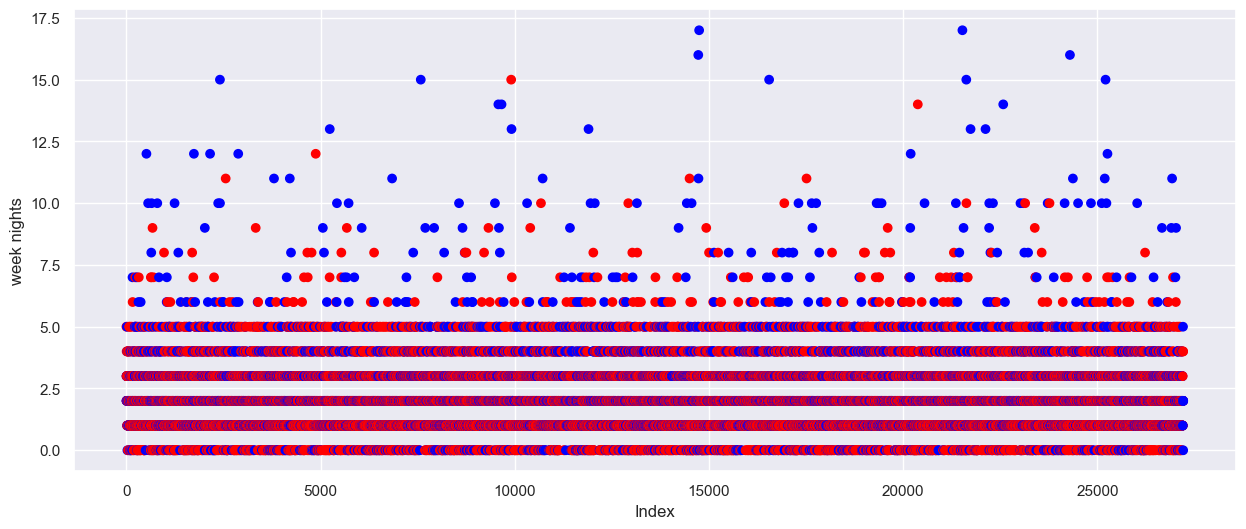

In [45]:
colordict = {0: 'red', 1: 'blue'}

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['week_nights'], c = df['is_canceled'].map(colordict))
plt.xlabel("Index")
plt.ylabel('week nights')

Text(0, 0.5, 'weekend nights')

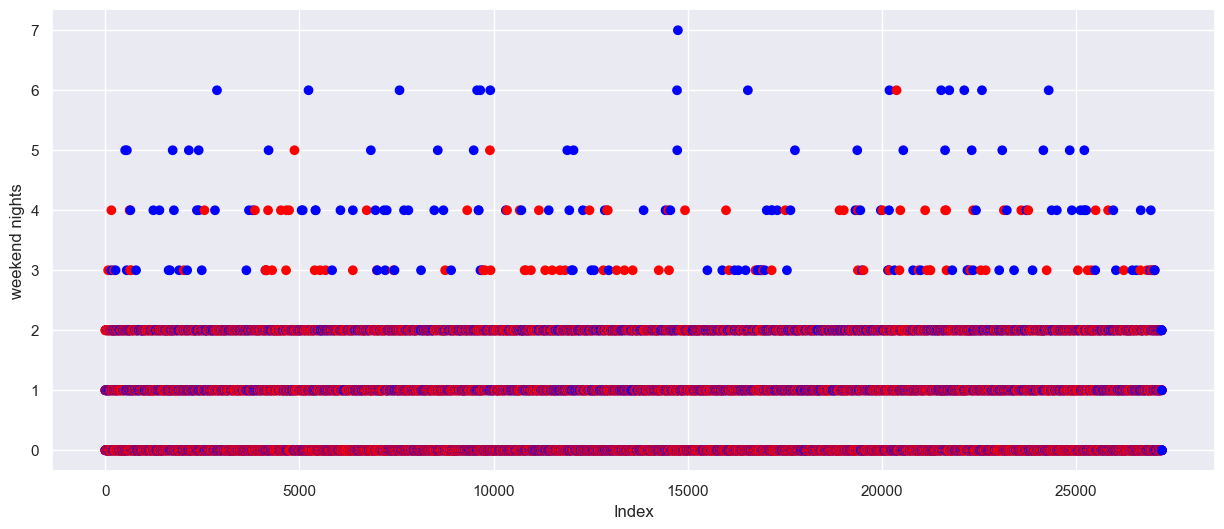

In [46]:
colordict = {0: 'red', 1: 'blue'}

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['weekend_nights'], c = df['is_canceled'].map(colordict))
plt.xlabel("Index")
plt.ylabel('weekend nights')

#### Boxplot graph 

c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\amiri\anaconda3\envs\DataMiningEnviorment\lib\site-packag

<Axes: xlabel='n_adults', ylabel='price'>

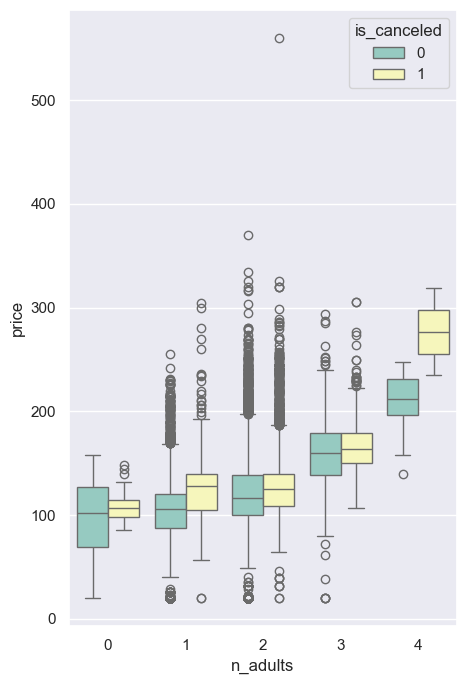

In [47]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="price", x="n_adults", hue= "is_canceled", data=df, palette="Set3")

## Show and explain attributes correlations

Handling missing values

In [48]:
float_rows = df[df['lead_time'].apply(lambda x: isinstance(x, float))]
float_rows

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,day,year
0,INN09588,1,5,1,half board,2,0,0,0,2,...,Online,0,0,0,108.4,11/28/2018,0,11,28,2018
1,INN07691,0,3,1,Missing,2,0,0,0,0,...,Missing,0,0,0,NaN,11/03/2018,1,11,3,2018
2,INN32192,0,2,4,half board,1,0,0,0,1,...,Online,0,0,0,137.3,05/06/2018,0,5,6,2018
3,INN32218,1,2,1,Missing,2,0,0,0,0,...,Offline,0,0,0,127.0,9/26/2018,1,9,26,2018
4,INN02994,1,3,4,half board,2,0,1,0,2,...,Offline,0,0,0,110.0,10/19/2017,0,10,19,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,INN09056,1,2,1,Missing,3,0,0,0,1,...,Missing,0,0,0,NaN,7/18/2018,0,7,18,2018
27209,INN24796,0,4,1,half board,2,0,0,0,1,...,Online,0,0,0,113.0,2/24/2018,0,2,24,2018
27210,INN22554,0,2,1,Missing,2,0,0,0,0,...,Offline,0,0,0,105.0,4/15/2018,1,4,15,2018
27211,INN33957,1,0,4,half board,1,0,0,0,0,...,Aviation,0,0,0,130.0,5/22/2018,1,5,22,2018


lead time is a continious number so we'll fill the missing values with generated numbers from its distribtuion

In [49]:
lead_time_mean = np.mean(df['lead_time'])
lead_time_lambda = 1 / lead_time_mean
generated_values = np.random.exponential(scale=lead_time_lambda, size=419)
df['lead_time_1'] = df['lead_time']
df['lead_time_1'] = df['lead_time_1']
missing_rows = df['lead_time_1'].isna()

# Replace missing values with generated exponential values
df.loc[missing_rows, 'lead_time_1'] = generated_values[:sum(missing_rows)]

In [50]:
df['lead_time_1'] = df['lead_time_1'].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  int32  
 4   board_type           27213 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        27213 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

##### we now show that we maintained the distribution of 'lead_time' and filled the missing values

27213

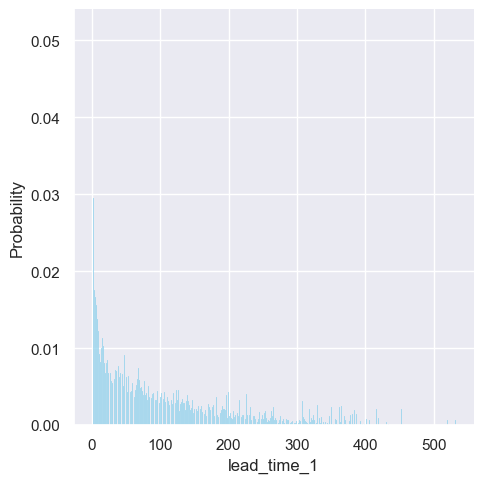

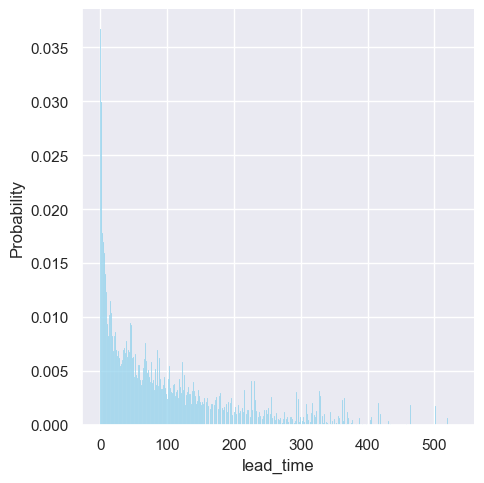

In [52]:
sns.displot(df['lead_time_1'], color='skyblue' ,stat="probability", discrete=True )
sns.displot(df['lead_time'], color='skyblue' ,stat="probability", discrete=True )
len(df['lead_time_1'])

#### we will do the same the the 'price' attribute

In [53]:
mean_value = df['price'].mean()
variance_value = df['price'].var()
generated_values = np.random.normal(loc=mean_value, scale=np.sqrt(variance_value), size=3405)
df['price_1'] = df['price']
missing_rows = df['price_1'].isna()
df.loc[missing_rows, 'price_1'] = generated_values[:sum(missing_rows)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  int32  
 4   board_type           27213 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        27213 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

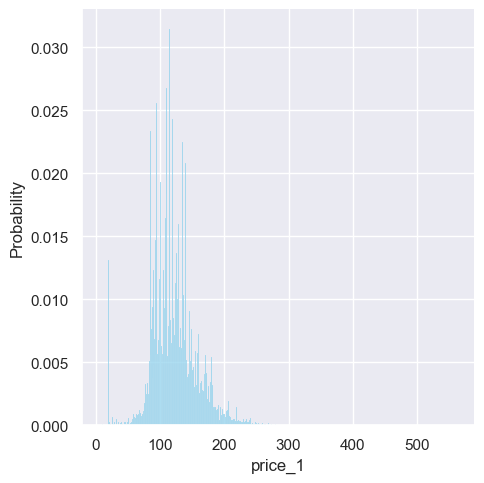

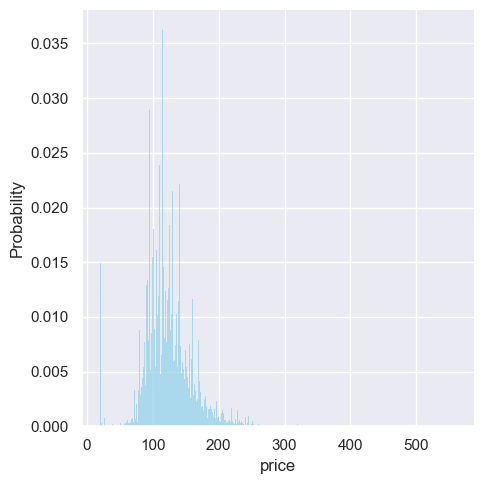

In [54]:
sns.displot(df['price_1'], color='skyblue' ,stat="probability", discrete=True )
sns.displot(df['price'], color='skyblue' ,stat="probability", discrete=True )

In [55]:
df[df.describe().columns].corr(method = 'pearson')

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled,month,day,year,lead_time_1,price_1
weekend_nights,1.000000,0.172582,0.060986,0.106355,0.019048,0.020736,-0.033336,0.060688,0.045434,-0.023784,-0.029500,-0.072326,-0.000601,0.066571,-0.010650,0.027046,0.054034,0.044396,-0.000990
week_nights,0.172582,1.000000,0.093326,0.105197,0.009291,0.020412,-0.052188,0.046046,0.149524,-0.027565,-0.048246,-0.100375,0.020085,0.093008,0.038131,-0.011824,0.026954,0.146980,0.016172
room_type,0.060986,0.093326,1.000000,0.270896,0.276393,0.278152,0.039589,0.145410,-0.106801,-0.006050,-0.009804,-0.023882,0.469287,0.026948,-0.003375,0.033736,0.100778,-0.104873,0.408854
n_adults,0.106355,0.105197,0.270896,1.000000,-0.005528,-0.022964,0.009166,0.188380,0.096608,-0.046387,-0.124772,-0.199585,0.301024,0.087098,0.024162,0.031535,0.074005,0.095454,0.258036
n_less_12,0.019048,0.009291,0.276393,-0.005528,1.000000,0.125932,0.036395,0.094793,-0.040479,-0.012620,-0.015822,-0.025912,0.257406,0.022208,-0.004092,0.017881,0.028867,-0.040059,0.221994
n_more_12,0.020736,0.020412,0.278152,-0.022964,0.125932,1.000000,0.020203,0.099084,-0.033408,-0.012587,-0.017378,-0.029303,0.252388,0.023083,-0.002145,0.019873,0.036370,-0.033797,0.217509
booked_tour,-0.033336,-0.052188,0.039589,0.009166,0.036395,0.020203,1.000000,0.091335,-0.062729,0.021167,0.068105,0.113914,0.057756,-0.086230,-0.017726,-0.000227,0.015890,-0.061550,0.052352
n_requests,0.060688,0.046046,0.145410,0.188380,0.094793,0.099084,0.091335,1.000000,-0.099829,0.000753,0.030748,-0.009791,0.179417,-0.250765,0.109392,0.020993,0.056227,-0.098300,0.152060
lead_time,0.045434,0.149524,-0.106801,0.096608,-0.040479,-0.033408,-0.062729,-0.099829,1.000000,-0.047808,-0.080618,-0.139704,-0.063702,0.436932,0.138318,0.004269,0.143061,1.000000,-0.053504
n_p_cacellation,-0.023784,-0.027565,-0.006050,-0.046387,-0.012620,-0.012587,0.021167,0.000753,-0.047808,1.000000,0.473422,0.384761,-0.062945,-0.036572,-0.034569,-0.013823,0.001002,-0.047231,-0.053382


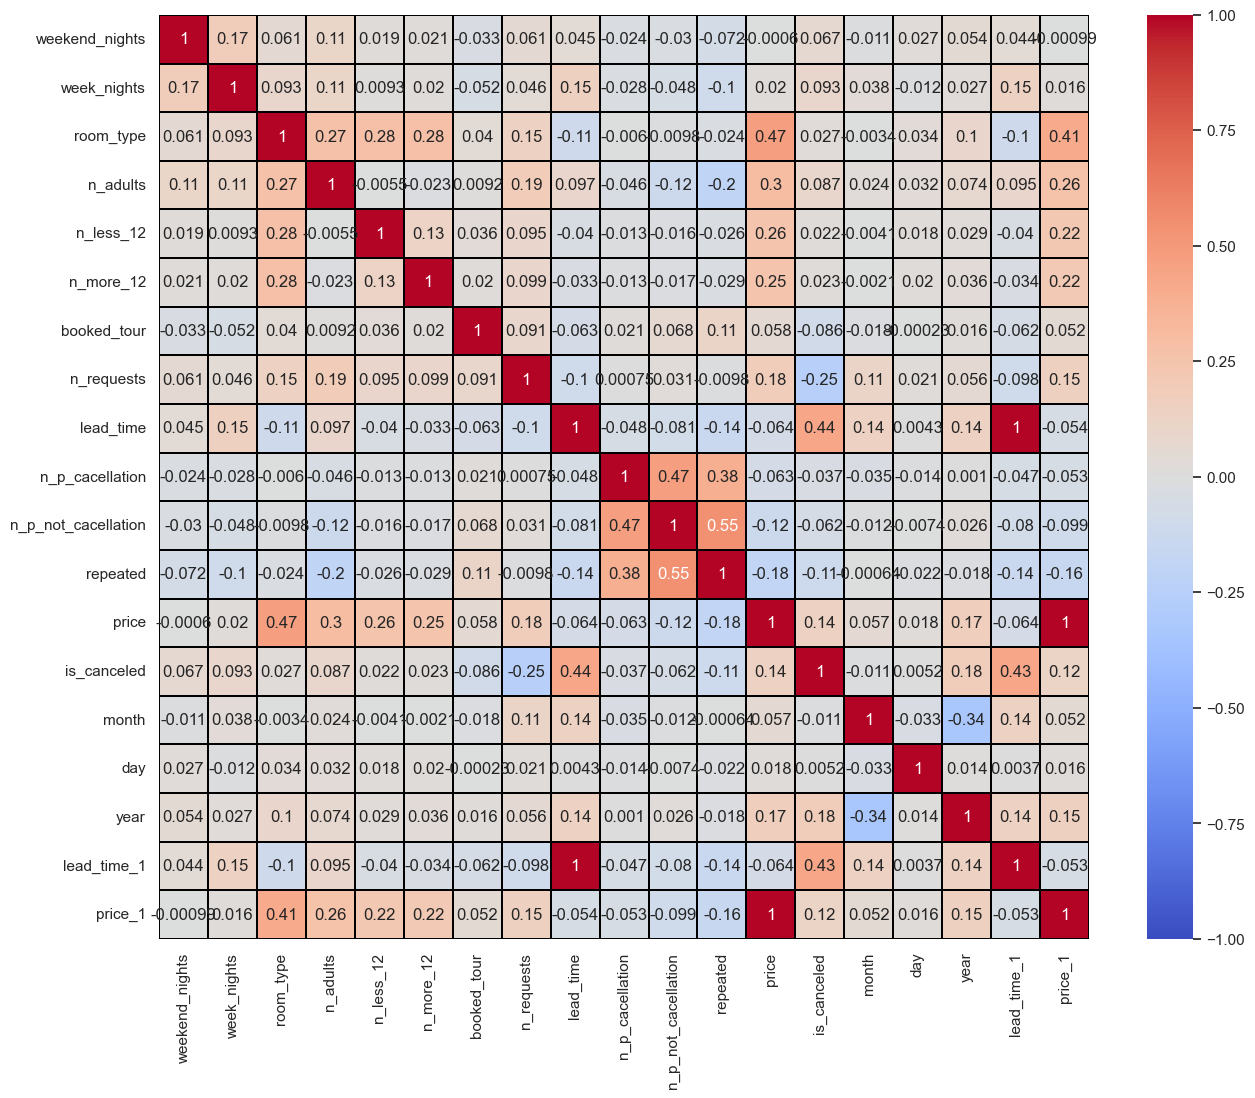

In [56]:
f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')

<Figure size 1000x1000 with 0 Axes>

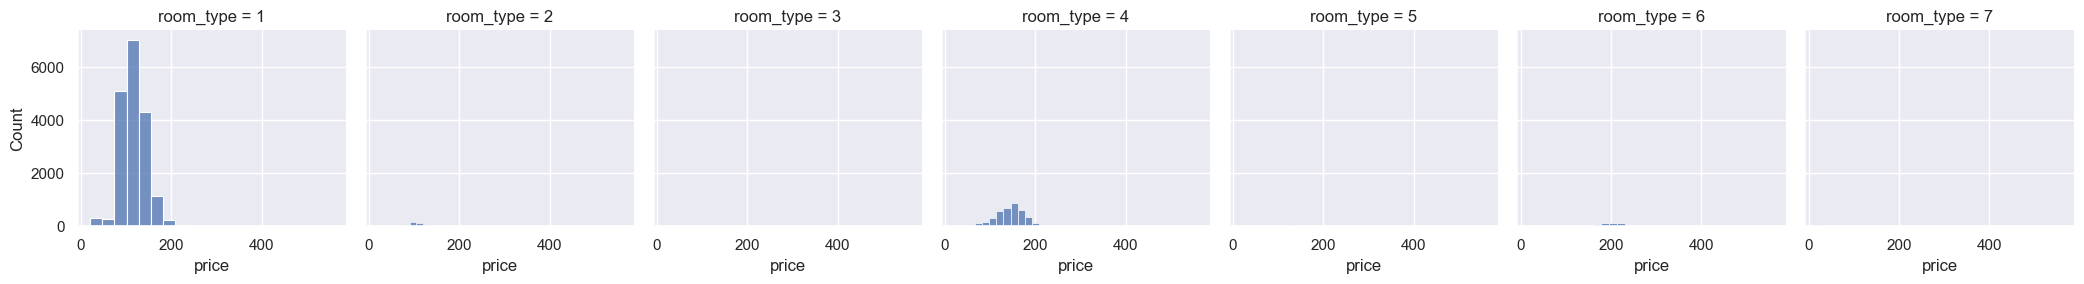

<Figure size 1000x1000 with 0 Axes>

In [57]:
g = sns.FacetGrid(df, col="room_type")
g.map_dataframe(sns.histplot, x="price", bins=20)
plt.figure(figsize=(10, 10))

In [58]:
for i in sorted(df['room_type'].unique()):
    print('For class ', i, ' the median is ', df.loc[df['room_type']==i , 'price'].median())
    print('For class ', i, ' the mean is ', df.loc[df['room_type']==i , 'price'].mean())
    print('and the number of missing price values is ', df.loc[df['room_type']==i , 'price'].isnull().sum(), 
          'out of ',(df['room_type']==i).sum(), 'rows \n' )

For class  1  the median is  114.5
For class  1  the mean is  115.88661138211383
and the number of missing price values is  2634 out of  21084 rows 

For class  2  the median is  105.85499999999999
For class  2  the mean is  108.92675438596491
and the number of missing price values is  55 out of  511 rows 

For class  3  the median is  100.75
For class  3  the mean is  111.91666666666667
and the number of missing price values is  0 out of  3 rows 

For class  4  the median is  147.65
For class  4  the mean is  145.5463647767185
and the number of missing price values is  585 out of  4571 rows 

For class  5  the median is  139.4
For class  5  the mean is  143.66717948717948
and the number of missing price values is  24 out of  180 rows 

For class  6  the median is  200.2
For class  6  the mean is  200.2548049921997
and the number of missing price values is  100 out of  741 rows 

For class  7  the median is  212.245
For class  7  the mean is  174.05896551724138
and the number of missin

In class 1 and 4 there are too many missing values hence we will handle them differently.

In [59]:
df['price_2'] = df['price']
for i in [2,3,5,6,7]:
    df.loc[df['room_type']==i , 'price_2'] = df['price_2'][df['room_type']==i].fillna(value=df['price'][df['room_type']==i].median())

In [60]:
mu_1 = df.loc[df['room_type']==1 , 'price_2'].mean()
sigma_1 = df.loc[df['room_type']==1 , 'price_2'].std()
[mu_1 , sigma_1]
mu_4 = df.loc[df['room_type']==4 , 'price_2'].mean()
sigma_4 = df.loc[df['room_type']==4 , 'price_2'].std()
print([mu_1 , sigma_1], [mu_4 , sigma_4])

[115.88661138211383, 28.011879210933973] [145.5463647767185, 33.52729782025586]


In [61]:
missing_rows = (df['room_type'] == 1) & df['price'].isnull()
df.loc[missing_rows, 'price_2'] = np.random.normal(mu_1, sigma_1, 2634)

missing_rows = (df['room_type'] == 4) & df['price'].isnull()
df.loc[missing_rows, 'price_2'] = np.random.normal(mu_4, sigma_4, 585)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  int32  
 4   board_type           27213 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        27213 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

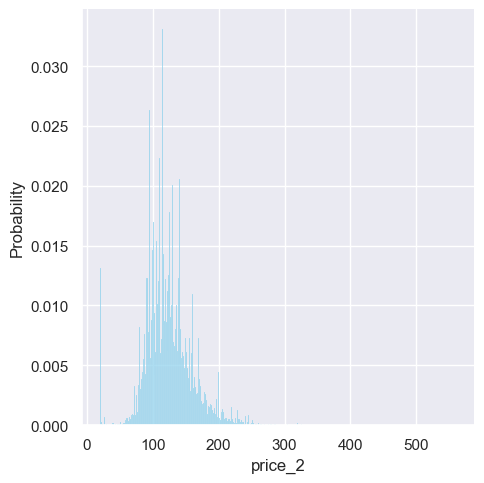

In [62]:
sns.displot(df['price_2'], color='skyblue' ,stat="probability", discrete=True )

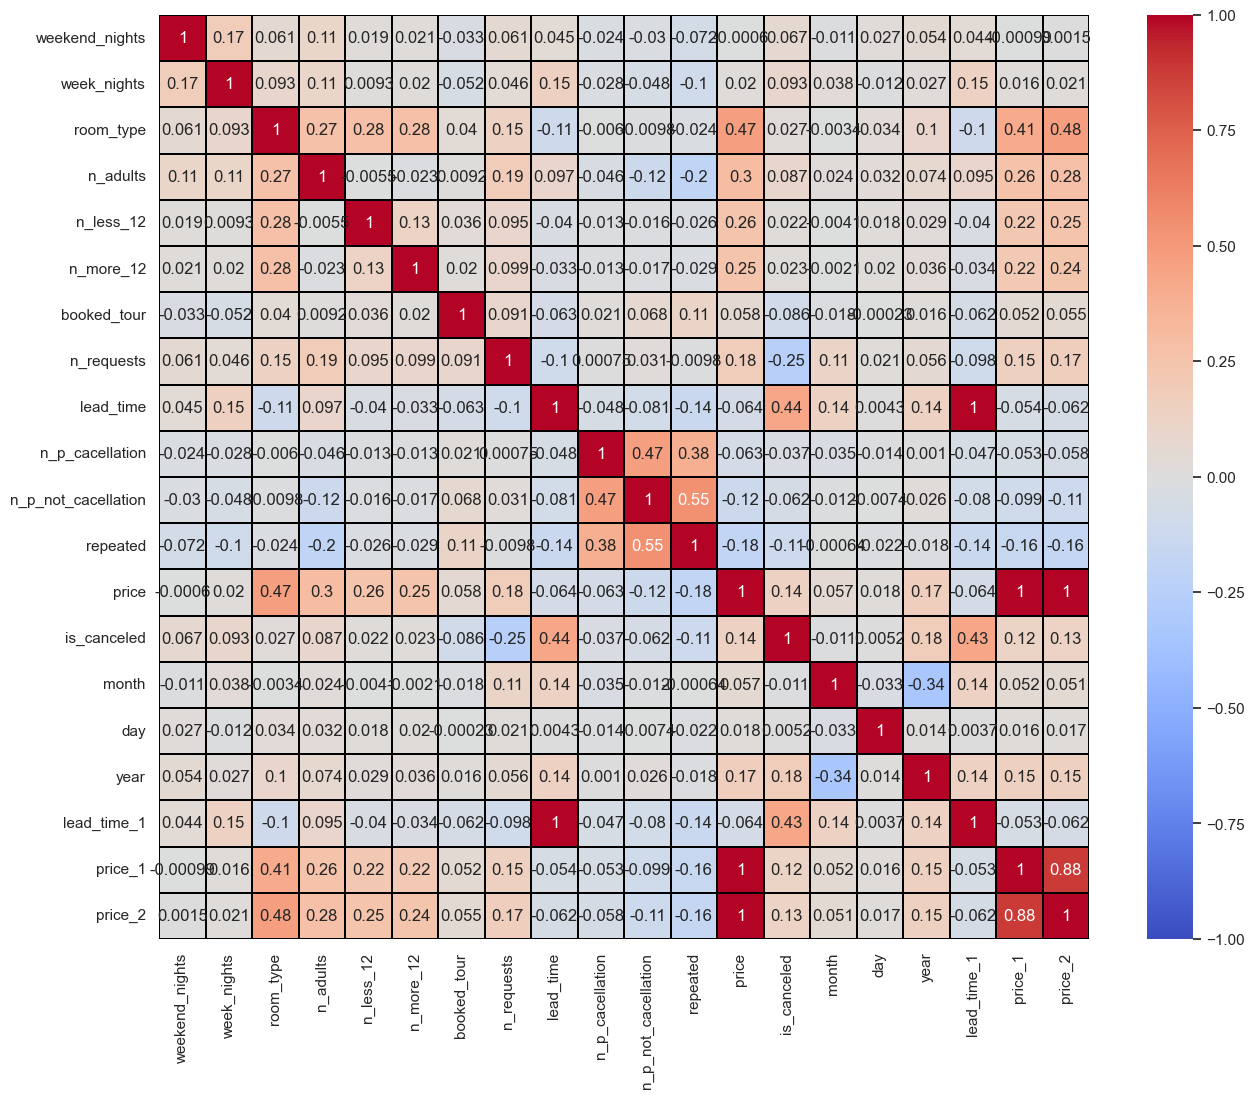

In [63]:
f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df[df.describe().columns].corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black')

#### Finding Outliers

In [64]:
data_mean = df['price_2'].mean()
data_std = df['price_2'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['price_2'] > upper_bound) | (df['price_2'] < lower_bound)]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,repeated,price,date,is_canceled,month,day,year,lead_time_1,price_1,price_2
13,INN15451,2,5,6,breakfast,2,1,1,0,0,...,0,248.60,4/16/2018,1,4,16,2018,39,248.60,248.60
14,INN10191,1,3,6,half board,2,0,2,0,0,...,0,240.73,9/22/2018,1,9,22,2018,102,240.73,240.73
98,INN21633,1,0,4,half board,3,0,0,0,1,...,0,276.00,8/15/2018,1,8,15,2018,3,276.00,276.00
183,INN33956,1,2,4,Missing,2,0,0,0,0,...,0,334.10,12/30/2018,0,12,30,2018,69,334.10,334.10
271,INN21089,2,5,6,breakfast,2,1,1,0,0,...,0,242.17,10/23/2018,1,10,23,2018,122,242.17,242.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26586,INN14762,2,5,4,breakfast,3,0,0,0,2,...,0,232.40,08/12/2018,1,8,12,2018,118,232.40,232.40
26888,INN28220,0,2,4,breakfast,3,0,0,1,2,...,0,248.60,8/19/2018,0,8,19,2018,48,248.60,248.60
26968,INN21342,2,1,6,half board,2,0,2,0,0,...,0,244.33,3/26/2018,1,3,26,2018,21,244.33,244.33
26975,INN31304,0,3,7,Missing,2,1,1,0,2,...,0,229.10,6/29/2018,0,6,29,2018,2,229.10,229.10


we can see that we have quite a lot of "outliers" so we will expand the std to 6

In [65]:
data_mean = df['price_2'].mean()
data_std = df['price_2'].std()
cut_off = data_std * 6
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['price_2'] > upper_bound) | (df['price_2'] < lower_bound)]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,repeated,price,date,is_canceled,month,day,year,lead_time_1,price_1,price_2
183,INN33956,1,2,4,Missing,2,0,0,0,0,...,0,334.10,12/30/2018,0,12,30,2018,69,334.10,334.10
4092,INN34307,0,3,6,breakfast,2,0,2,0,1,...,0,369.63,12/29/2018,0,12,29,2018,52,369.63,369.63
9412,INN33115,0,1,1,half board,2,0,0,0,0,...,0,560.00,3/25/2018,1,3,25,2018,42,560.00,560.00


deleting the outliers

In [66]:
outliers_indices_to_delete = [183, 4092, 9412]
df = df.drop(outliers_indices_to_delete)
df.loc[(df['price_2'] > upper_bound) | (df['price_2'] < lower_bound)]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,repeated,price,date,is_canceled,month,day,year,lead_time_1,price_1,price_2


In [67]:
df

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,repeated,price,date,is_canceled,month,day,year,lead_time_1,price_1,price_2
0,INN09588,1,5,1,half board,2,0,0,0,2,...,0,108.4,11/28/2018,0,11,28,2018,34,108.400000,108.400000
1,INN07691,0,3,1,Missing,2,0,0,0,0,...,0,NaN,11/03/2018,1,11,3,2018,365,136.089515,130.679089
2,INN32192,0,2,4,half board,1,0,0,0,1,...,0,137.3,05/06/2018,0,5,6,2018,148,137.300000,137.300000
3,INN32218,1,2,1,Missing,2,0,0,0,0,...,0,127.0,9/26/2018,1,9,26,2018,502,127.000000,127.000000
4,INN02994,1,3,4,half board,2,0,1,0,2,...,0,110.0,10/19/2017,0,10,19,2017,32,110.000000,110.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,INN09056,1,2,1,Missing,3,0,0,0,1,...,0,NaN,7/18/2018,0,7,18,2018,106,132.638717,140.132100
27209,INN24796,0,4,1,half board,2,0,0,0,1,...,0,113.0,2/24/2018,0,2,24,2018,18,113.000000,113.000000
27210,INN22554,0,2,1,Missing,2,0,0,0,0,...,0,105.0,4/15/2018,1,4,15,2018,147,105.000000,105.000000
27211,INN33957,1,0,4,half board,1,0,0,0,0,...,0,130.0,5/22/2018,1,5,22,2018,3,130.000000,130.000000


REVISIT - inconsistencies

trying to find more outliers

In [68]:
for column_name in df.columns:
    unique_count = df[column_name].nunique()
    print(column_name + ": " + str(unique_count))

ID: 27210
weekend_nights: 8
week_nights: 18
room_type: 7
board_type: 5
n_adults: 5
n_less_12: 5
n_more_12: 5
booked_tour: 2
n_requests: 6
lead_time: 350
purchase_type: 6
n_p_cacellation: 8
n_p_not_cacellation: 50
repeated: 2
price: 3159
date: 552
is_canceled: 2
month: 12
day: 31
year: 4
lead_time_1: 350
price_1: 6564
price_2: 6380


In [69]:
for column_name in cat_col:
    unique_values = df[column_name].nunique()
    print(f"Feature '{column_name}' has {unique_values} unique value(s).")

    # Count occurrences of each unique value
    value_counts = df[column_name].value_counts()
    print(f"Value counts for '{column_name}':\n{value_counts}\n")

Feature 'weekend_nights' has 8 unique value(s).
Value counts for 'weekend_nights':
weekend_nights
0    12619
1     7491
2     6857
3      115
4       89
5       23
6       15
7        1
Name: count, dtype: int64

Feature 'n_adults' has 5 unique value(s).
Value counts for 'n_adults':
n_adults
2    19562
1     5781
3     1749
0      104
4       14
Name: count, dtype: int64

Feature 'n_more_12' has 5 unique value(s).
Value counts for 'n_more_12':
n_more_12
0    26049
1      876
2      282
3        2
4        1
Name: count, dtype: int64

Feature 'n_less_12' has 5 unique value(s).
Value counts for 'n_less_12':
n_less_12
0    26037
1      910
2      260
3        2
6        1
Name: count, dtype: int64

Feature 'n_requests' has 6 unique value(s).
Value counts for 'n_requests':
n_requests
0    14784
1     8595
2     3257
3      511
4       56
5        7
Name: count, dtype: int64

Feature 'room_type' has 7 unique value(s).
Value counts for 'room_type':
room_type
1    21083
4     4570
6      740


we will change the outlier features to the most frequent value of the feature

In [70]:
df.loc[df['weekend_nights'] == 7, 'weekend_nights'] = 0
df.loc[(df['n_more_12'] == 3) | (df['n_more_12'] == 4), 'n_more_12'] = 0
df.loc[(df['n_less_12'] == 3) | (df['n_less_12'] == 6), 'n_less_12'] = 0
df.loc[df['room_type'] == 3, 'room_type'] = 1
df.loc[(df['year'] == 2015) | (df['year'] == 2016), 'year'] = 2018


## discretezaition

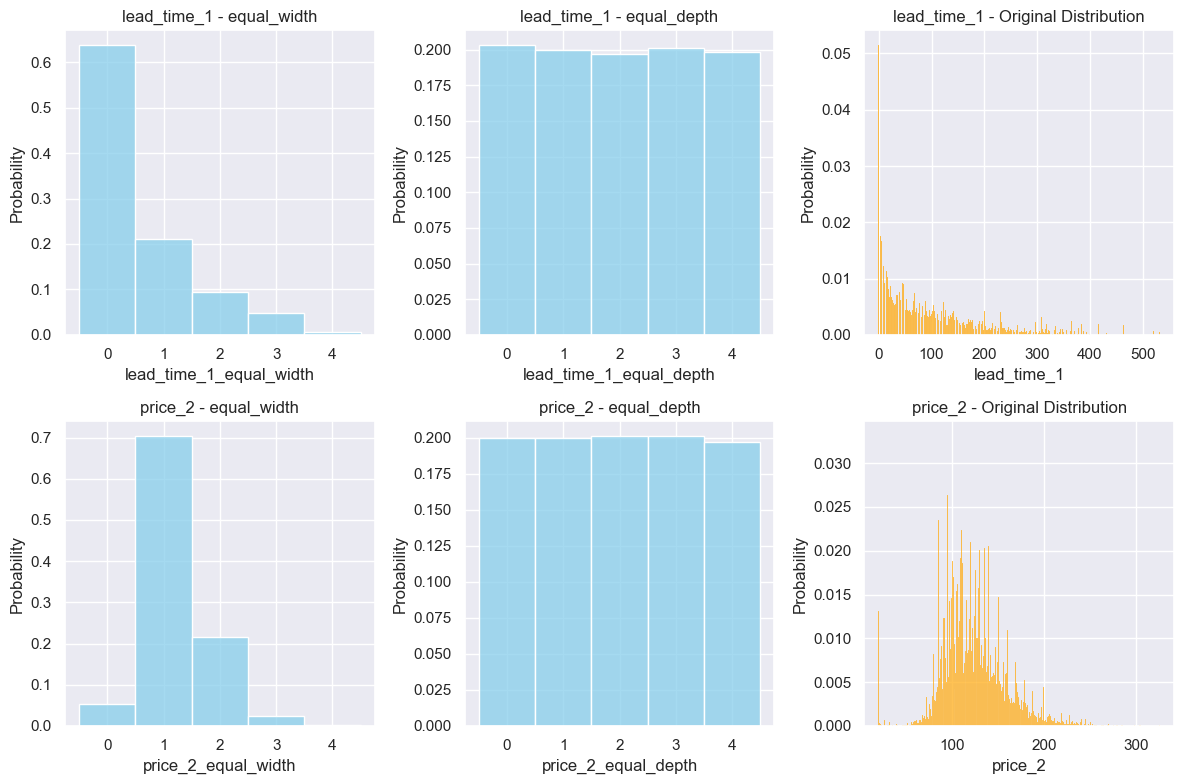

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

columns = ['lead_time_1', 'price_2']
discrete_partitions = ['equal_width', 'equal_depth']

# Create subplots for each column
fig, axs = plt.subplots(len(columns), len(discrete_partitions) + 1, figsize=(12, 8))  # +1 for original distribution

for i, column_name in enumerate(columns):
    for j, partition in enumerate(discrete_partitions):
        bin_column_name = column_name + '_' + partition
        if 'width' in partition:
            df[bin_column_name] = pd.cut(df[column_name], bins=5, labels=False, include_lowest=True, right=False)
            df_counts = df[bin_column_name].value_counts().sort_index()
        elif 'depth' in partition:
            df[bin_column_name] = pd.qcut(df[column_name], q=5, labels=False, duplicates='drop')
            df_counts = df[bin_column_name].value_counts().sort_index()

        sns.histplot(data=df, x=bin_column_name, color='skyblue', stat="probability", discrete=True, ax=axs[i, j])
        axs[i, j].set_title(f"{column_name} - {partition}")
        axs[i, j].set_xlabel(bin_column_name)
        axs[i, j].set_ylabel('Probability')

    # Plot original distribution in the last column
    sns.histplot(data=df, x=column_name, color='orange', stat="probability", discrete=True, ax=axs[i, len(discrete_partitions)])
    axs[i, len(discrete_partitions)].set_title(f"{column_name} - Original Distribution")
    axs[i, len(discrete_partitions)].set_xlabel(column_name)
    axs[i, len(discrete_partitions)].set_ylabel('Probability')

plt.tight_layout()
plt.show()


Normalization

In [72]:
columns = ['price_2', 'lead_time_1']
for column in columns:
    scaler = MinMaxScaler()
    scaler.fit(pd.DataFrame(df[column]))
    df[column+'_min_max'] = scaler.transform(pd.DataFrame(df[column]))
    print('Min - max normalization of '+column)
    print('Min value: '+str(scaler.data_min_))
    print('Max value: '+str(scaler.data_max_))
    print(df[[column,column+'_min_max']].head())


Min - max normalization of price_2
Min value: [20.]
Max value: [326.]
      price_2  price_2_min_max
0  108.400000         0.288889
1  130.679089         0.361696
2  137.300000         0.383333
3  127.000000         0.349673
4  110.000000         0.294118
Min - max normalization of lead_time_1
Min value: [0.]
Max value: [532.]
   lead_time_1  lead_time_1_min_max
0           34             0.063910
1          365             0.686090
2          148             0.278195
3          502             0.943609
4           32             0.060150
